说明：softmax输出/映射/激活后：所有可能的结果，**概率值和为1**。

其实就是对逻辑回归sigmoid激活函数的拓展而已：当只有2类时，和sigmoid逻辑回归结果完全一致。—— softmax就是sigmoid的多元拓展而已！

---

注意：softmax是激活函数，和sigmoid是同类的，都作用于输出层！多分类问题对应的**Loss损失函数**为（和binary_crossentropy同类，都是**交叉熵！**）：
- categorical_crossentropy —— 独热编码
- sparse_categorical_crossentropy —— 顺序数字编码


---

数据集说明：Fashion_MNIST和MNIST都是经典数据集，Fashion是10种**灰度图像服饰（一共10w张）**。MNIST是10种**灰度图像数字**。本例用6w张图进行训练，在另外1w张图上进行效果测试！

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print( format(tf.__version__) )

2.0.0


In [4]:
# 加载数据集:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

# 训练集数据形状：
train_image.shape, train_label.shape
# 测试集数据形状：
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

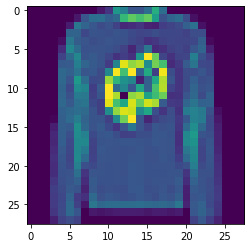

In [11]:
# 画图看看：
plt.imshow( train_image[123,:,:] ) # 123张图：所有行所有列

In [5]:
np.max(train_image) # 范围0-255

255

In [6]:
train_label  # 顺序编码：属于什么类，就用对应的数字标志

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# 数据处理：

In [12]:
# 归一化：不喜欢太大的数！
train_image = train_image / 255
test_image = test_image / 255

# 模型搭建与训练：在训练集上！

In [8]:
model = tf.keras.Sequential()

In [9]:
# 先把二维数组展开为一维数据：因为“全连接”神经网络必须是：一维数据 —— 映射 —— 一维数据 ！！！
# 展平层：所有的数据/图，进入Dense层前先被展平！ —— (60000,28,28) -> (60000,784) 
model.add( tf.keras.layers.Flatten( input_shape = (28,28) ) )  

# 实际隐藏层：有了展平层，就无需再input_shape了！
model.add( tf.keras.layers.Dense(128, activation = 'relu') )

# 输出层：分10类，故输出10个；再用softmax激活函数进行最好的概率映射！
model.add( tf.keras.layers.Dense(10, activation = 'softmax') )  

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',  # 顺序编码！
    metrics = ['acc'] 
)

In [11]:
model.fit(train_image, train_label, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 2.9158 - acc: 0.7038
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.6787 - acc: 0.7657
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5773 - acc: 0.7990
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5405 - acc: 0.8123
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5106 - acc: 0.8262


# 对模型进行评价：在测试集上！

In [12]:
model.evaluate(test_image, test_label)
# 在测试集上的精度是0.8076

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5832020829200745, 0.8076]